In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
df = pd.read_csv("teste_dados_ecommerce.csv", sep=';', encoding = 'unicode_escape')

In [267]:
# Verificando informaoes do dataframe
df.shape

(541909, 9)

In [268]:
# Verificando os 10 primeiros dados da tabela
df.head(10)

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom
5,536365,2,22752,SET 7 BABUSHKA NESTING BOXES,2,12/01/10 08:26,7.65,17850.0,United Kingdom
6,536365,2,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/01/10 08:26,4.25,17850.0,United Kingdom
7,536366,5,22633,HAND WARMER UNION JACK,6,12/01/10 08:28,1.85,17850.0,United Kingdom
8,536366,2,22632,HAND WARMER RED POLKA DOT,6,12/01/10 08:28,1.85,17850.0,United Kingdom
9,536367,4,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/01/10 08:34,1.69,13047.0,United Kingdom


In [269]:
# Efetuando um info da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StoreId      541909 non-null  int64  
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [270]:
# Verificando valores ausentes
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
InvoiceNo           0
StoreId             0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [271]:
# Verificando valores ausentes novamente
df_full_fill = df.fillna(0)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Retirando valores iguais a zero na coluna 'TotalPrice'
df2 = df[df.TotalPrice > 0]
df2.head(5)

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34


In [272]:
# Efetuando um describe da tabela
df2.describe()

,StoreId,Quantity,UnitPrice,CustomerID,TotalPrice
count,530104.000000,530104.000000,530104.000000,397884.000000,530104.000000
mean,10.492062,10.542037,3.907625,15294.423453,20.121871
std,5.766126,155.524124,35.915681,1713.141560,270.356743
min,1.000000,1.000000,0.001000,12346.000000,0.001000
25%,5.000000,1.000000,1.250000,13969.000000,3.750000
50%,10.000000,3.000000,2.080000,15159.000000,9.900000
75%,15.000000,10.000000,4.130000,16795.000000,17.700000
max,20.000000,80995.000000,13541.330000,18287.000000,168469.600000


In [273]:
# verificando colunas
df2.columns

Index(['InvoiceNo', 'StoreId', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

In [274]:
# Resposta questão 1
vendas_por_lojas = df2.groupby(['StoreId']).sum().drop(columns=['CustomerID', 'UnitPrice']).reset_index()
ranking_lojas = vendas_por_lojas.sort_values('TotalPrice', ascending=False)[:10]
ranking_lojas

,StoreId,Quantity,TotalPrice
16,17,351969,692392.120
3,4,359687,648217.880
12,13,277927,548195.710
15,16,264426,536429.950
0,1,269760,525055.821
1,2,268378,523368.440
2,3,267364,522640.490
8,9,278195,521955.310
4,5,266774,521898.120
14,15,276156,521226.120


Text(0.5, 1.0, '10 LOJAS COM MAIOR FATURAMENTO EM PEDIDOS')

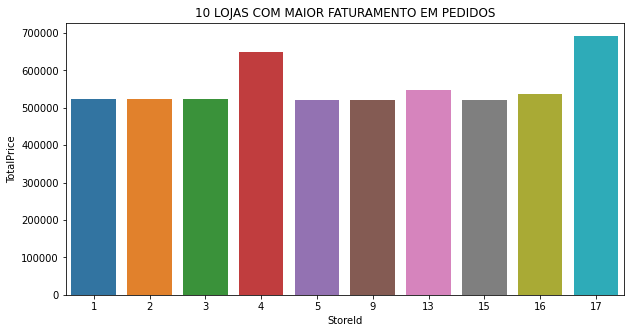

In [275]:
# Plotagem do gráfico - Resposta questão 1
plt.figure(figsize=(10,5))
g=sns.barplot(x = ranking_lojas['StoreId'] , y = ranking_lojas['TotalPrice'])
g.set_title('10 LOJAS COM MAIOR FATURAMENTO EM PEDIDOS')

In [276]:
# Resposta questão 2 - ticket medio mensal dos pedidos
ticket_medio = df2["TotalPrice"].mean()
print(f"O valor do ticket medio mensal é: {round(ticket_medio, 3)}")

O valor do ticket medio mensal é: 20.122


In [277]:
# Resposta questão 2 - volume medio mensal dos vendas
volume_medio = df2["Quantity"].mean()
print(f"O volume medio mensal de todas as lojas é: {round(volume_medio, 3)}")

O volume medio mensal de todas as lojas é: 10.542


In [278]:
# Explorando dados - resposta questão 3
# vendas_por_pais = df2.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:5]
vendas_por_pais = df2['Country'].value_counts().sort_values(ascending=False)[:5]
vendas_por_pais

United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Name: Country, dtype: int64

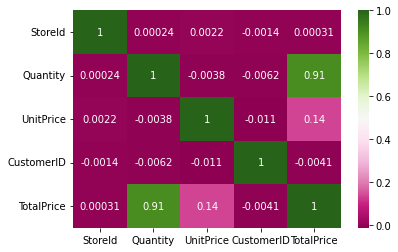

Resposta: Sim. Conforme os dados, existe uma correlação entre o país e volume de itens vendidos, visto que os Estados Unidos é o país que mais compra devido a quantidade de itens adquiridos.


In [279]:
# Explorando dados - resposta questão 3
# Mapa de correlação das variáveis numéricas
sns.heatmap(df2.corr(), annot=True, cmap="PiYG")
plt.show()
print(f"Resposta: Sim. Conforme os dados, existe uma correlação entre o país e volume de itens vendidos, visto que os Estados Unidos é o país que mais compra devido a quantidade de itens adquiridos.")
# referencia link = https://dadosaocubo.com/analise-exploratoria-de-dados-com-python-parte-ii/

In [280]:
# Explorando dados - resposta questão 3
# filtrando o pais de mais venda
df_best_seller_country = df2.query('Country == "United Kingdom"')
df_best_seller_country.head(5)

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/10 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,9,71053,WHITE METAL LANTERN,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/10 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/10 08:26,3.39,17850.0,United Kingdom,20.34


In [281]:
# Explorando dados - resposta questão 3
ranking_top10_produtos_mais_vendidos = df_best_seller_country['Description'].value_counts().sort_values(ascending=False)[:10]
ranking_top10_produtos_mais_vendidos

WHITE HANGING HEART T-LIGHT HOLDER    2227
JUMBO BAG RED RETROSPOT               1957
REGENCY CAKESTAND 3 TIER              1710
PARTY BUNTING                         1614
LUNCH BAG RED RETROSPOT               1421
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG  BLACK SKULL.               1271
SET OF 3 CAKE TINS PANTRY DESIGN      1255
NATURAL SLATE HEART CHALKBOARD        1233
HEART OF WICKER SMALL                 1188
Name: Description, dtype: int64

In [282]:
# Resposta questão 3 - Produto Mais Vendido
nome_do_produto = ranking_top10_produtos_mais_vendidos.index.tolist()[0]
print(f"Resposta: O item mais vendido no país de maior volume de vendas é = {nome_do_produto}")

Resposta: O item mais vendido no país de maior volume de vendas é = WHITE HANGING HEART T-LIGHT HOLDER


In [306]:
# Resposta questão 3 - Produto Menos Vendido
df3 = df2[df2.Quantity == 1]
print(f"Resposta: Como temos {df3.shape[0]} vendidos uma única vez, a resposta para o produto menos vendido são todos esses {df3.shape[0]}.")
df3.head(5)

Resposta: Como temos 147823 vendidos uma única vez, a resposta para o produto menos vendido são todos esses 147823.


,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
113,536381,12,71270,PHOTO CLIP LINE,1,12/01/10 09:41,1.25,15311.0,United Kingdom,1.25
114,536381,8,22262,FELT EGG COSY CHICKEN,1,12/01/10 09:41,0.85,15311.0,United Kingdom,0.85
115,536381,8,22637,PIGGY BANK RETROSPOT,1,12/01/10 09:41,2.55,15311.0,United Kingdom,2.55
118,536381,20,21166,COOK WITH WINE METAL SIGN,1,12/01/10 09:41,1.95,15311.0,United Kingdom,1.95
120,536381,9,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,12/01/10 09:41,2.95,15311.0,United Kingdom,2.95


In [284]:
# Explorando dados - Resposta questao 4
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["Year"] = df['InvoiceDate'].dt.year
df["Month"] = df['InvoiceDate'].dt.month
df["Day"] = df['InvoiceDate'].dt.day
df.head(5)
groupby_year_month = df.groupby(['Year', 'Month'])["Quantity"].count()
groupby_year_month

Year  Month
2010  12       42481
2011  1        35147
      2        27707
      3        36748
      4        29916
      5        37030
      6        36874
      7        39518
      8        35284
      9        50226
      10       60742
      11       84711
      12       25525
Name: Quantity, dtype: int64

In [285]:
# Explorando dados - Resposta questo 4
# Ranking dos 5 melhores meses de venda
groupby_year_month.sort_values(ascending=False)[:5]

Year  Month
2011  11       84711
      10       60742
      9        50226
2010  12       42481
2011  7        39518
Name: Quantity, dtype: int64

In [307]:
# Explorando dados - Resposta questao 4
# Analizando o describe dos 2 produtos mais vendidos
nome_do_produto = ranking_top10_produtos_mais_vendidos.index.tolist()[:2]
separador = "-"
for produto in nome_do_produto:
  dados_por_produto = df2.query(f'Description == @produto')
  print(f"Analize do Produto - {produto}")
  print(dados_por_produto.describe())
  print('')
  print(separador*100)

Analize do Produto - WHITE HANGING HEART T-LIGHT HOLDER
           StoreId     Quantity    UnitPrice    CustomerID   TotalPrice
count  2323.000000  2323.000000  2323.000000   2028.000000  2323.000000
mean     10.402927    16.311235     3.216948  15563.149901    45.756681
std       5.736342    71.312350     0.989717   1616.092756   191.050631
min       1.000000     1.000000     2.400000  12370.000000     2.950000
25%       5.000000     3.000000     2.950000  14239.000000     8.850000
50%      10.000000     6.000000     2.950000  15601.000000    17.700000
75%      15.000000    12.000000     2.950000  16931.000000    35.400000
max      20.000000  1930.000000     6.770000  18283.000000  4921.500000

----------------------------------------------------------------------------------------------------
Analize do Produto - JUMBO BAG RED RETROSPOT
           StoreId     Quantity    UnitPrice    CustomerID   TotalPrice
count  2112.000000  2112.000000  2112.000000   1618.000000  2112.000000
mean 

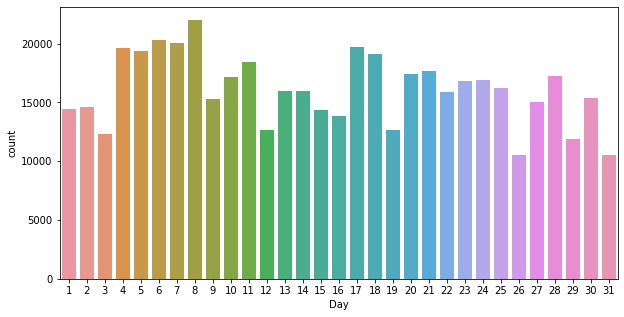

In [287]:
# Explorando dados - Resposta questao 4
# Dataframe apenas do ano 2011
year_2011 = df.query('Year == 2011')

# Gráfico dos dias do mês com maiores vendas em 2011
plt.figure(figsize=(10,5))
sns.countplot(x = year_2011['Day'])
plt.show()

In [292]:
# Explorando dados - Resposta questao 4
# Ordem dos 10 dias com maiores vendas
year_2011['Day'].value_counts()[:10]

8     22011
6     20304
7     20035
17    19690
4     19617
5     19379
18    19129
11    18417
21    17658
20    17410
Name: Day, dtype: int64

In [288]:
# Resposta questao 4
ideias_estrategias = ['Ter lojas ou envio para o país Estados Unidos, visto que é o maior consumidor de produtos.', 'Qualificar estratégias de vendas para o primeiro semestre do ano, haja vista que nesse período temos um volume de vendas consideravelmente menor do que o segundo semestre.', 'Estar preparado para atender a demanda do segundo semestre.', 'Procurar vender produtos com preço unitário baixo e alta demanda.', 'Intensificar estratégias de vendas para o período do mês entre os dias 4 à 8, onde acontece o maior volume de vendas durante o mês.']

print("Resposta Questão 4")
print(separador*100)
for dicas in ideias_estrategias:
  print(f"> {dicas}")

Resposta Questão 4
----------------------------------------------------------------------------------------------------
> Ter lojas ou envio para o país Estados Unidos, visto que é o maior consumidor de produtos.
> Qualificar estratégias de vendas para o primeiro semestre do ano, haja vista que nesse período temos um volume de vendas consideravelmente menor do que o segundo semestre.
> Estar preparado para atender a demanda do segundo semestre.
> Procurar vender produtos com preço unitário baixo e alta demanda.
> Intensificar estratégias de vendas para o período do mês entre o dia 4 à 8, onde acontece o maior volume de vendas durante o mês
